## Problem 1. a)

### The optimal parameter vector $\hat{w}$ is computed as: 

$$ \hat{w} = (X^T X + \lambda N I)^{-1} X^T y , $$

which is the closed form solution to 

$$ \hat{w} = \arg\min_{w} \frac{1}{N} \sum_{i\in[N]} \left\lVert w^T x_i - y_i \right\rVert_2^2 + \lambda\lVert w \rVert_2^2$$
$$ = \arg\min_{w} \frac{1}{N}\left\lVert y - X w \right\rVert_2^2 + \lambda \lVert w\rVert_2^2. $$

This can be realized by noting that the objective function is convex, and the solution $ \hat{w} $ is found by setting the gradient of the objective function to zero and solving for $w$, as:

$$ (X^T X + \lambda N I)^{-1} \hat{w} = X^T y .$$

## Problem 1. b)

In [1]:
##imports from libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

from sklearn import linear_model

from numpy.linalg import inv
from numpy import identity as eye

### Load the data. The csv file is separated NOT using commas, but semicolons...

In [2]:
data = pd.read_csv("./Data/household_power_consumption/household_power_consumption.txt", sep=";", low_memory=False)

### We print here the available columns:

In [3]:
print(data.columns.values)

['Date' 'Time' 'Global_active_power' 'Global_reactive_power' 'Voltage'
 'Global_intensity' 'Sub_metering_1' 'Sub_metering_2' 'Sub_metering_3']


Load the regressors X and the response vector y. They are still Pandas dataframes:

In [4]:
X = data.iloc[:, 3:9]
y = data.iloc[:, 2]

In [5]:
X.isna().sum()

Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
y.isna().sum()

0

Note that we have NaN-values in X! We should drop them. We drop the rows of the raw data that contain NaN-values, and reload the matrices X and y.

We use the "Global Reactive power" as desired response y, and the other 6 columns, not including time or date, as regressors.

In [7]:
data.dropna(axis=0, inplace=True)

X = data.iloc[:, 3:9]
y = data.iloc[:, 2]
X.isna().sum()

Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
X_ = X.to_numpy(dtype = np.dtype).astype(np.float)
y_ = y.to_numpy(dtype = np.dtype).astype(np.float).reshape(-1,1) # make as column vector of dimension (N,1)

N, d = X_.shape
reg = 1

X_ = np.hstack((X_,np.ones((N,1))))
N, d = X_.shape

print("X_", X_)
print("y_", y_)


X_ [[  0.418 234.84   18.4   ...   1.     17.      1.   ]
 [  0.436 233.63   23.    ...   1.     16.      1.   ]
 [  0.498 233.29   23.    ...   2.     17.      1.   ]
 ...
 [  0.    239.82    3.8   ...   0.      0.      1.   ]
 [  0.    239.7     3.8   ...   0.      0.      1.   ]
 [  0.    239.55    3.8   ...   0.      0.      1.   ]]
y_ [[4.216]
 [5.36 ]
 [5.374]
 ...
 [0.938]
 [0.934]
 [0.932]]


In [9]:
X_.shape

(2049280, 7)

In [10]:
y_.shape

(2049280, 1)

In [11]:
w_hat = inv(X_.T @ X_ + reg*N*eye(d)) @ X_.T @ y_

In [12]:
y_hat = X_ @ w_hat

### Here we plot the estimated responses $\hat{y}$ as a function of each respective regressor component. 
We also report the normalized MSE:

$$\frac{1}{N}\sum_{i\in[N]} \frac{( y_i - \hat{y}_i)^2 }{\lVert y\rVert_2^2}.$$

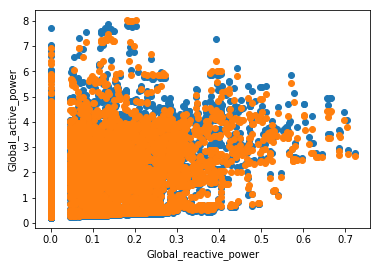

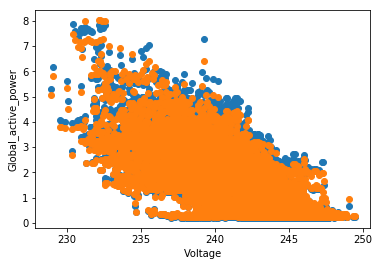

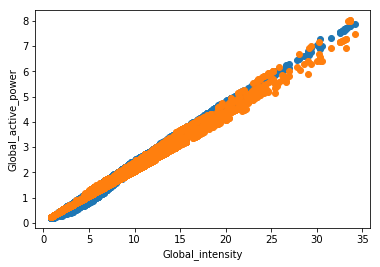

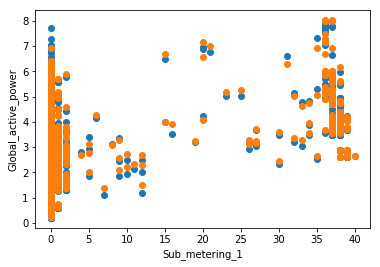

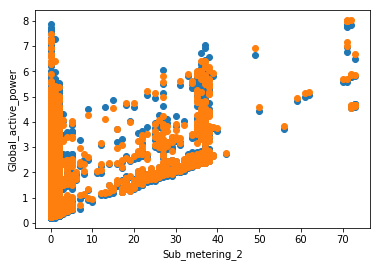

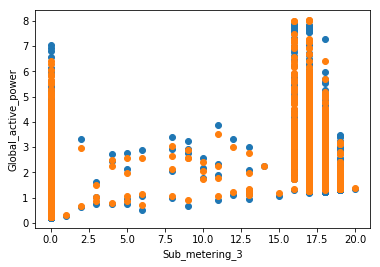

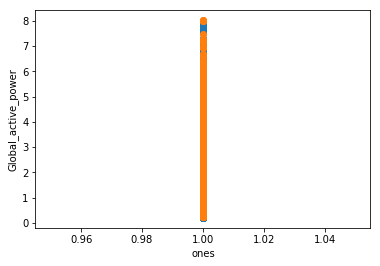

In [13]:
n_plot = 10000
for i in range(d-1):
    plt.figure(i)
    plt.xlabel(X.columns[i])
    plt.ylabel(y.name)
    plot(X_[0:n_plot,i], y_[0:n_plot, 0], 'o')
    plot(X_[0:n_plot,i], y_hat[0:n_plot, 0], 'o')

plt.figure(6)
plt.xlabel("ones")
plt.ylabel(y.name)
plot(X_[0:n_plot,6], y_[0:n_plot, 0], 'o')
plot(X_[0:n_plot,6], y_hat[0:n_plot, 0], 'o')

In [14]:
# compute normalized MSE 
np.sum((y_ - y_hat)**2)/np.sum(y_**2)

0.0037522654781811243

## Problem 1. c)

Now for the Greenhouse gas observation network data. The data consists of Ns = 2921 , with 327 columns of data in each. Each column has 16 rows. We will use the first 15 rows to estimate the 16th.

There is supposed to be NO missing data.

We will loop through all the 2921 files to structure the data.

In [15]:
N_sites = 2921
N_cols  = 327
dghg = 15
Nghg = N_sites * N_cols

In [16]:
ghgdata = np.zeros((dghg+1, Nghg))

pathprefix = "./Data/ghg_data/ghg_data/ghg.gid.site"
for i in range(N_sites):
    filename = pathprefix + str(i + 1).zfill(4) + ".dat"
    subdata = np.genfromtxt(filename, delimiter=" ")
    ghgdata[:,i*N_cols:(i+1)*N_cols] = subdata
print(ghgdata)

[[1.203126e-04 1.211998e-04 1.185726e-04 ... 1.137271e-01 8.292924e-02
  2.941329e-01]
 [1.249627e-04 1.212128e-04 1.185730e-04 ... 3.029846e-01 4.954412e-01
  3.338647e-01]
 [1.208030e-04 1.212013e-04 1.185726e-04 ... 7.156584e+00 2.669355e+00
  2.457192e+00]
 ...
 [1.279752e+01 6.571398e+00 8.581361e+00 ... 1.542260e-02 3.210971e-02
  6.052777e-02]
 [1.001826e-04 6.566996e-04 1.000031e-04 ... 2.984635e-01 1.405631e+01
  1.342927e+01]
 [2.991491e+01 3.007330e+01 1.472816e+01 ... 1.157865e+01 9.819178e+00
  3.046360e+01]]


In [119]:
N_train = int(Nghg*0.75)
N_test = Nghg - N_train

H = ghgdata[0:dghg, :].T # (Nghg, dghg)
g = ghgdata[dghg, :].reshape(Nghg,1) # (Nghg, 1)

H_test = ghgdata[0:dghg, N_train:N_train+N_test].T # (N_test,dghg)
g_test = ghgdata[15, N_train:N_train+N_test].reshape(N_test, 1)

# N_train = 10000
H_train = ghgdata[0:dghg, 0:N_train].T # (N_train,dghg)
g_train = ghgdata[15, 0:N_train].reshape(N_train, 1)

assert(H.shape == (Nghg, dghg))
assert(g.shape == (Nghg, 1))
assert(H_train.shape == (N_train, dghg))
assert(H_test.shape == (N_test, dghg))
assert(g_train.shape==(N_train,1))
assert(g_test.shape==(N_test,1))

print(H_train.shape)
print(H_test.shape)
print(g_train.shape)
print(g_test.shape)

(716375, 15)
(238792, 15)
(716375, 1)
(238792, 1)


In [194]:
reg_ghg = 0.000001

In [195]:
def cost(x, y, w, lambda_ = 0.01):
    N, d = x.shape
    value = 0
    for i in range(N):
        Z = -1 * y[i] * w.T @ (x[i, :]).reshape(d, 1)
        value += np.log(1 + np.exp(Z))
    norm_w = np.linalg.norm(w)
    c = lambda_ * norm_w ** 2
    return value/N + c

In [196]:
v_train = inv(H_train.T @ H_train + reg_ghg*N_train*eye(dghg)) @ H_train.T @ g_train
print(v_train.flatten())

v_opt = inv(H.T @ H + reg_ghg*Nghg*eye(dghg)) @ H.T @ g
print(v_opt.flatten())

[12.9388506   1.05807826  0.68358789  0.7536922   0.44358613  9.34410874
  0.68661817  0.70416628  0.79403022  0.7159374   0.71902543  0.69786812
  0.76346061  0.69808812  1.19997124]
[3.16270386 1.28019355 0.68415026 0.8089533  0.41830534 9.67933839
 0.68684304 0.7072139  0.80471699 0.72332524 0.72158349 0.69804104
 0.7714218  0.69869072 1.15420519]


In [197]:
print(cost(H_test, g_test, v_hat, reg_ghg).flatten())
print(cost(H_test, g_test, v_opt, reg_ghg).flatten())

[0.0239233]
[0.02697336]


In [47]:
g_hat = H @ v_hat

In [48]:
# compute normalized MSE 
np.sum((g - g_hat)**2)/np.sum(g**2)

0.17499496374451243

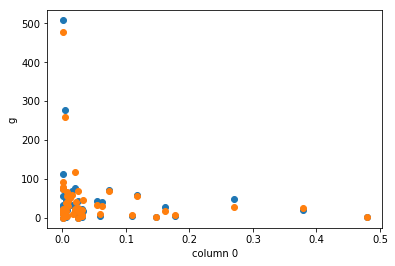

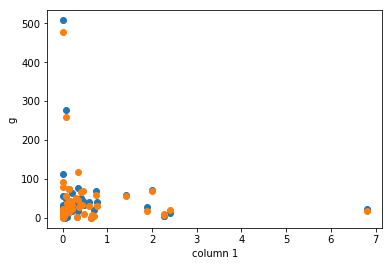

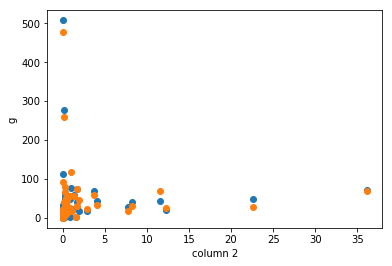

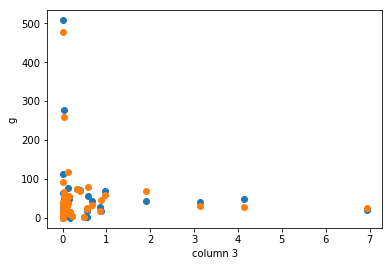

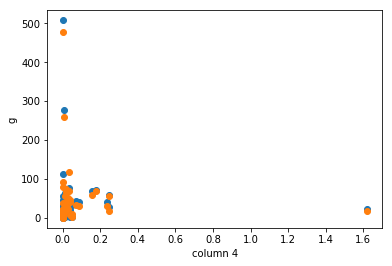

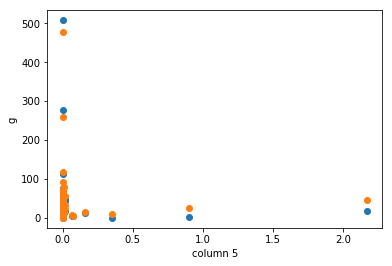

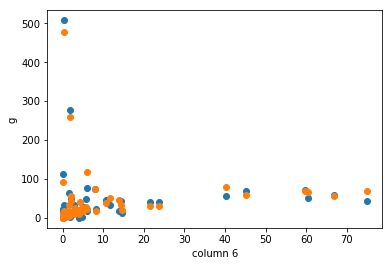

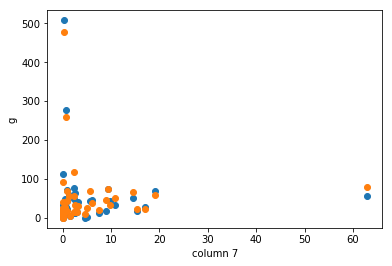

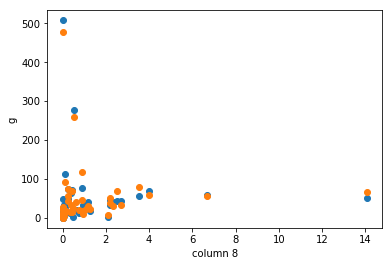

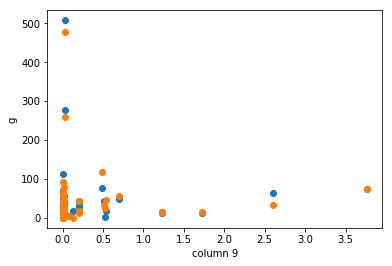

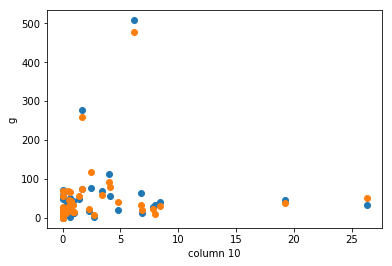

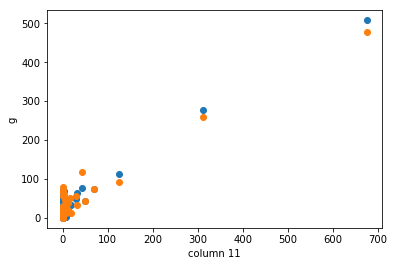

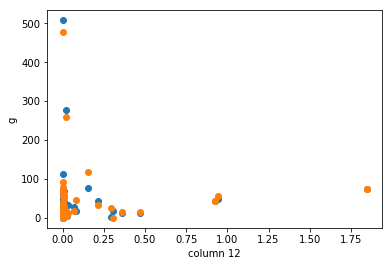

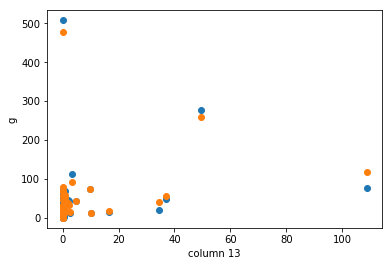

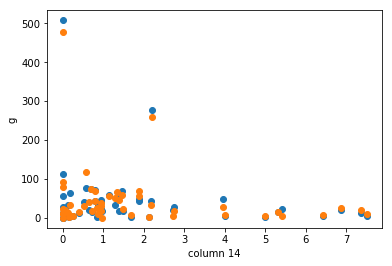

In [24]:
n_plot = 50
randoms = np.random.choice(Nghg, n_plot, replace=0)
for i in range(dghg):
    plt.figure(i)
    plt.xlabel("column " + str(i))
    plt.ylabel("g")
    plot(H[randoms,i], g[randoms, 0], 'o')
    plot(H[randoms,i], g_hat[randoms, 0], 'o')